# Descubra quem fez o ENEM 2016 apenas para treino

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

### Importando o dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
model = test['NU_INSCRICAO']

# Analisando os dados

In [3]:
train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


### Analisando o target

In [5]:
train['IN_TREINEIRO'].isna().sum()

0

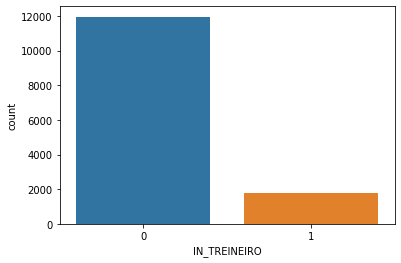

In [6]:
ax = sns.countplot(x='IN_TREINEIRO', data=train)

In [7]:
train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [8]:
print(f"Apenas {1783/len(train)*100}% da base é composto por treineiros. Podemos assumir então que um base line seria um acerto de 87%")

Apenas 12.986161689730515% da base é composto por treineiros. Podemos assumir então que um base line seria um acerto de 87%


### Analisando outros dados do dataset

#### Valores nulos

In [9]:
pd.DataFrame([train[test.columns].isna().sum(), train[test.columns].isna().sum()/len(train)*100]).T

,0,1
NU_INSCRICAO,0.0,0.000000
CO_UF_RESIDENCIA,0.0,0.000000
SG_UF_RESIDENCIA,0.0,0.000000
NU_IDADE,0.0,0.000000
TP_SEXO,0.0,0.000000
TP_COR_RACA,0.0,0.000000
TP_NACIONALIDADE,0.0,0.000000
TP_ST_CONCLUSAO,0.0,0.000000
TP_ANO_CONCLUIU,0.0,0.000000
TP_ESCOLA,0.0,0.000000


#### Buscando no dicionario de dados, as features que inicialmente acredito serem interessantes para o modelo são:
- NU_IDADE > Idade
- TP_ST_CONCLUSAO > Situação de conclusão do Ensino Médio
- TP_ANO_CONCLUIU > Ano de Conclusão do Ensino Médio
- TP_ESCOLA > Tipo de escola do Ensino Médio
- TP_ENSINO > Tipo de instituição que concluiu ou concluirá o Ensino Médio (Possui nulos)

Porém, tenho uma hipótese de que a idade, a situação de conclusão do EM e o ano de conclusão são suficientes para constuir um modelo simples. Portanto, vamos separa-las:

In [10]:
features = ['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','IN_TREINEIRO']

In [11]:
train[features].dtypes

NU_IDADE           int64
TP_ST_CONCLUSAO    int64
TP_ANO_CONCLUIU    int64
IN_TREINEIRO       int64
dtype: object

In [12]:
train[features].groupby(['IN_TREINEIRO']).describe().T

IN_TREINEIRO                      0            1
NU_IDADE        count  11947.000000  1783.000000
                mean      22.396752    16.213685
                std        7.208893     0.754183
                min       14.000000    13.000000
                25%       18.000000    16.000000
                50%       20.000000    16.000000
                75%       24.000000    17.000000
                max       67.000000    18.000000
TP_ST_CONCLUSAO count  11947.000000  1783.000000
                mean       1.600988     3.000000
                std        0.798296     0.000000
                min        1.000000     3.000000
                25%        1.000000     3.000000
                50%        1.000000     3.000000
                75%        2.000000     3.000000
                max        4.000000     3.000000
TP_ANO_CONCLUIU count  11947.000000  1783.000000
                mean       2.466477     0.000000
                std        3.332580     0.000000
                min        0.000000     0.000000
                25%        0.000000     0.000000
                50%        1.000000     0.000000
                75%        4.000000     0.000000
                max       10.000000     0.000000

> NU_IDADE máxima para o treineiro é de 18 anos

> TP_ST_CONCLUSAO é de código 3 (concluirá o EM no ano seguinte) 

> TP_ANO_CONCLUIU é código 0 (Não informado)

### Atribuindo um peso para cada feature e setar ela em um gráfico

In [13]:
_features = ['NU_IDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU']
train[_features].describe()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU
count,13730.000000,13730.000000,13730.000000
mean,21.593809,1.782666,2.146176
std,7.043654,0.880734,3.217328
min,13.000000,1.000000,0.000000
25%,17.000000,1.000000,0.000000
50%,19.000000,2.000000,0.000000
75%,23.000000,2.000000,3.000000
max,67.000000,4.000000,10.000000


In [14]:
test[_features].describe()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU
count,4570.000000,4570.000000,4570.000000
mean,21.545295,1.767615,2.172867
std,6.790798,0.871374,3.250585
min,14.000000,1.000000,0.000000
25%,17.000000,1.000000,0.000000
50%,19.000000,2.000000,0.000000
75%,23.000000,2.000000,3.000000
max,63.000000,4.000000,10.000000


In [15]:
# idade maxima 2 bits, st_conclusao 1 bit, tp_ano 2 bits >> 5 bits
# a idade que é o mais "pesado" tem que ficar no bit menor, se não vai dar problema com outlier
def bit(x):
    return x[0] + x[1] * 1000 + x[2] * 100
    
bits = train[features].apply(bit, axis=1)
bits.head()

0    1424
1    2017
2    3021
3    1925
4    1428
dtype: int64

In [16]:
train[_features].head()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU
0,24,1,4
1,17,2,0
2,21,3,0
3,25,1,9
4,28,1,4


"biterização" validada

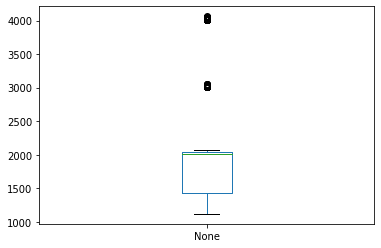

In [17]:
bits.plot(kind='box')

In [18]:
train[bits <= 2036][features].describe()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO
count,10325.000000,10325.000000,10325.000000,10325.0
mean,21.122034,1.410363,2.431671,0.0
std,5.167218,0.491923,3.123151,0.0
min,15.000000,1.000000,0.000000,0.0
25%,18.000000,1.000000,0.000000,0.0
50%,19.000000,1.000000,1.000000,0.0
75%,23.000000,2.000000,4.000000,0.0
max,66.000000,2.000000,10.000000,0.0


#### Não há nenhum treineiro com essa caracteristica.
#### Vamos verificar para os outliers

In [19]:
train[bits > 2036][features].describe()

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO
count,3405.000000,3405.000000,3405.000000,3405.000000
mean,23.024376,2.911601,1.280470,0.523642
std,10.788793,0.836237,3.341912,0.499514
min,13.000000,1.000000,0.000000,0.000000
25%,16.000000,3.000000,0.000000,0.000000
50%,17.000000,3.000000,0.000000,1.000000
75%,25.000000,3.000000,0.000000,1.000000
max,67.000000,4.000000,10.000000,1.000000


In [20]:
bits[bits > 2036].describe()

count    3405.000000
mean     3062.671953
std       563.257902
min      2037.000000
25%      3016.000000
50%      3017.000000
75%      3019.000000
max      4065.000000
dtype: float64

In [21]:
train[bits > 2036]['IN_TREINEIRO'].value_counts()

1    1783
0    1622
Name: IN_TREINEIRO, dtype: int64

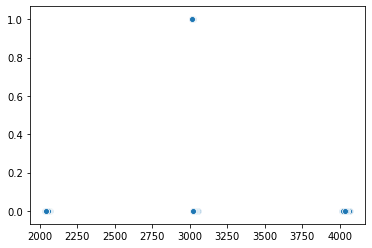

In [22]:
x = bits[bits > 2036].values
y = train[bits > 2036]['IN_TREINEIRO'].values
ax = sns.scatterplot(x, y)

#### O que é possível observar é que os treineiros tem uma relação forte com o código 0 - ano conclusao e o código 3 - situação conclusão. E nenhum foge deste critério. Sendo o diferencial de idade, já que temos alguns na mesma idade e não são treineiros

In [23]:
train[(bits > 2036) & (train['IN_TREINEIRO']==1)].describe()[features]

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO
count,1783.000000,1783.0,1783.0,1783.0
mean,16.213685,3.0,0.0,1.0
std,0.754183,0.0,0.0,0.0
min,13.000000,3.0,0.0,1.0
25%,16.000000,3.0,0.0,1.0
50%,16.000000,3.0,0.0,1.0
75%,17.000000,3.0,0.0,1.0
max,18.000000,3.0,0.0,1.0


In [24]:
train[(bits > 2036) & (train['IN_TREINEIRO']==0)].describe()[features]

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO
count,1622.000000,1622.000000,1622.000000,1622.0
mean,30.511097,2.814427,2.688039,0.0
std,11.691735,1.204337,4.434745,0.0
min,14.000000,1.000000,0.000000,0.0
25%,20.000000,1.000000,0.000000,0.0
50%,27.000000,3.000000,0.000000,0.0
75%,40.000000,4.000000,10.000000,0.0
max,67.000000,4.000000,10.000000,0.0


In [25]:
train[(bits > 2036) & (train['IN_TREINEIRO']==0) & (train['NU_IDADE'] <= 17)][features]

,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO
537,17,4,0,0
1520,17,4,0,0
1530,14,4,0,0
2302,14,4,0,0
2490,16,4,0,0
2559,14,4,0,0
2782,14,4,0,0
3245,16,4,0,0
4648,16,4,0,0
5039,14,4,0,0


# Tratamento dos dados
- Os dados estão desbalanceados, pode ser que seja necessário balancea-los
- É provavel que algoritmos de clusterização se deem melhor com as features selecionadas

### Iniciando o modelo

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

#### Verificando o base line

In [27]:
test['IN_TREINEIRO'] = 0
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,E,E,H,B,B,C,D,A,0
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,B,C,B,A,A,C,D,A,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,E,F,G,B,B,A,NaN,D,0
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,480.0,E,E,E,C,B,B,C,A,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,720.0,E,E,E,B,B,B,D,A,0


In [28]:
result = pd.DataFrame([model, np.around(test['IN_TREINEIRO'].values, 2)], index=['NU_INSCRICAO', 'IN_TREINEIRO']).T
result.to_csv('answer.csv', index = False, header = True)

#### SCORE: 87.39 | Isto ocorre por causa do desbalanceamento dos dados. Ou seja, se um algoritmo tiver um resultado abaixo ou próximo desse, talvez seja melhor considerarmos como "zero" pois teremos resultados melhores, vencendo pela "maioria"

In [29]:
model_features = ['NU_IDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU']
target = train['IN_TREINEIRO']

train = train[model_features]
test = test[model_features]

In [30]:
X, y = train.values, target

In [31]:
names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=3),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

In [32]:
pred = {}
for classifier in zip(names, classifiers):
    name = classifier[0]
    alg = classifier[1]
    alg.fit(X, y)
    pred_ = alg.predict(test.values)
    print(name, '-->', alg.score(X, y))
    pred[name] = pred_

Nearest Neighbors --> 0.9970138383102695
Linear SVM --> 0.9833211944646759
RBF SVM --> 0.9970138383102695
Decision Tree --> 0.9970138383102695
Random Forest --> 0.9970138383102695
Neural Net --> 0.9942461762563729
AdaBoost --> 0.9970138383102695
Naive Bayes --> 0.9745812090313183


In [33]:
pred

{'Nearest Neighbors': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'Linear SVM': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'RBF SVM': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'Decision Tree': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'Random Forest': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'Neural Net': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'AdaBoost': array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 'Naive Bayes': array([0, 0, 1, ..., 0, 0, 0], dtype=int64)}

#### Vamos aplicar a submissão para verificar qual algoritmo melhor se adapta aos dados de teste

In [34]:
result = pd.DataFrame([model, pred['AdaBoost']], index=['NU_INSCRICAO', 'IN_TREINEIRO']).T
result.to_csv('answer.csv', index = False, header = True)

# Resultado da submissão na Codenation
- Nearest Neighbors --> <b>99.693</b>
- Linear SVM --> <b>98.31</b>
- RBF SVM --> <b>99.7374</b>
- Decision Tree --> <b>99.7373</b>
- Random Forest --> <b>99.7374</b>
- Neural Net --> <b>99.343</b>
- AdaBoost --> <b>99.737</b>
- Naive Bayes --> <b>97.461</b>

## Usando SMOTE para o desbalanceamento dos dados

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [40]:
train[model_features].shape

(13730, 3)

In [43]:
X, y = smt.fit_sample(train[model_features], target)

In [47]:
X = X.values
y = y.values

In [55]:
X.shape, y.shape, len(train)

((23894, 3), (23894,), 13730)

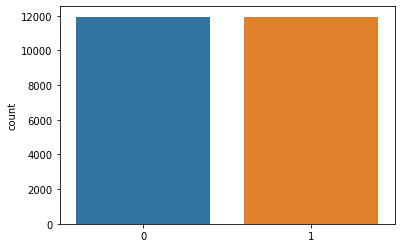

In [48]:
ax = sns.countplot(x=y)

In [49]:
pred = {}
for classifier in zip(names, classifiers):
    name = classifier[0]
    alg = classifier[1]
    alg.fit(X, y)
    pred_ = alg.predict(test.values)
    print(name, '-->', alg.score(X, y))
    pred[name] = pred_

Nearest Neighbors --> 0.9875701012806563
Linear SVM --> 0.9820875533606763
RBF SVM --> 0.9913785887670545
Decision Tree --> 0.9913785887670545
Random Forest --> 0.9913785887670545
Neural Net --> 0.9858960408470746
AdaBoost --> 0.9913785887670545
Naive Bayes --> 0.9835105047292207


In [53]:
result = pd.DataFrame([model, pred['Nearest Neighbors']], index=['NU_INSCRICAO', 'IN_TREINEIRO']).T
result.to_csv('answer.csv', index = False, header = True)

### Não houve melhora no score da submissão na Codenation aplicando SMOTE